Perceptron is an algo used for supervised ML. Perceptron is the basic fundamental block of Deep Learning

Now we see how to train perceptron

One method to train perceptron is using perceptron trick

PERCEPTRON TRICK

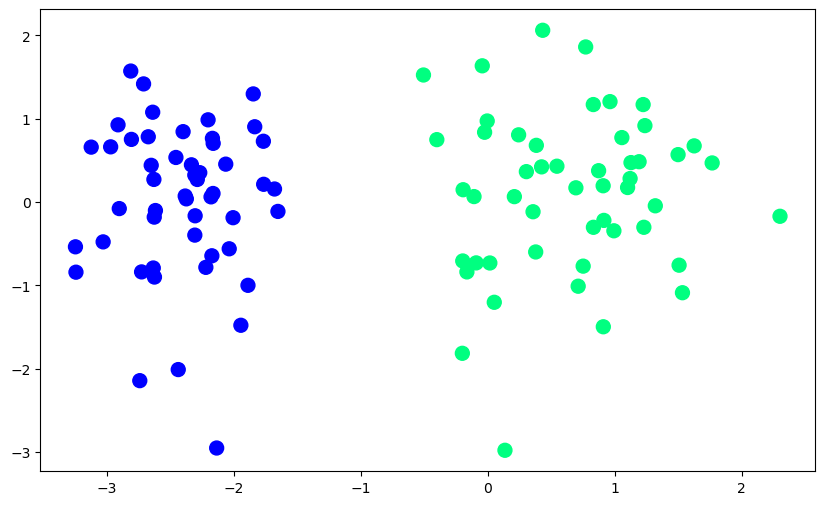

In [56]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=15)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)


In [57]:
X.shape

(100, 2)

In [58]:
y.shape

(100,)

In [59]:
def perceptron(x,y):
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_pred=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_pred)*x[j]
    return weights[0],weights[1:]
        

In [60]:
def step(z):
    return 1 if z>0 else 0

In [61]:
intercept,coeff=perceptron(X,y)

In [62]:
intercept ## this was the intercept of the final line

1.2000000000000002

In [63]:
coeff ### coeff of fianl line

array([1.19396695, 0.22954064])

In [64]:
m=-(coeff[0]/coeff[1])
b=-(intercept/coeff[1])

(-3.0, 2.0)

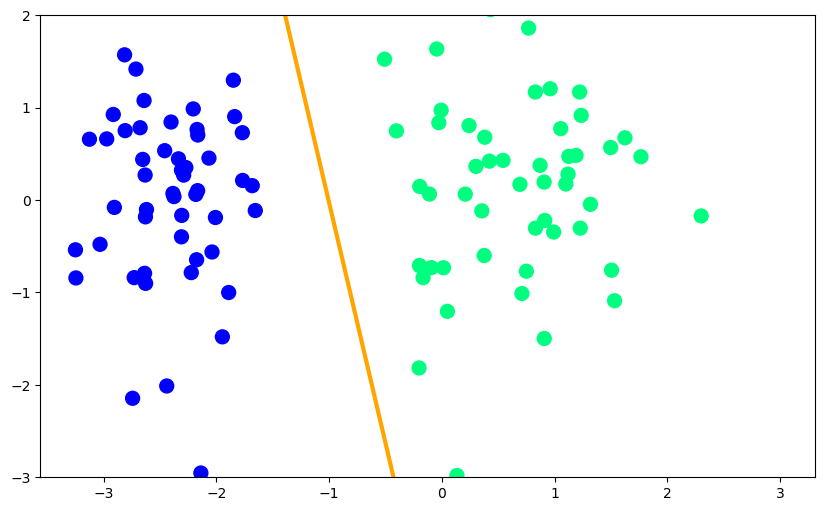

In [70]:
x_in=np.linspace(-3,3,100)
y_in=m*x_in+b
plt.figure(figsize=(10,6))
plt.plot(x_in,y_in,color='orange',linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

Actual perceptron implementation usese loss function and use gradient descent for minimizing the loss fucntion

In [66]:
def perceptron_updated(x,y):
    w1=w2=b1=1
    lr=0.01
    for j in range(10000):
        for i in range(x.shape[0]):
            z=w1*x[i][0]+w2*x[i][1]+b1
            if z*y[i]<0:
                w1=w1+lr*y[i]*x[i][0]
                w2=w2+lr*y[i]*x[i][1]
                b1=b1+lr*y[i]
    return w1,w2,b1

In [67]:
w1,w2,b1=perceptron_updated(X,y)

(-3.0, 2.0)

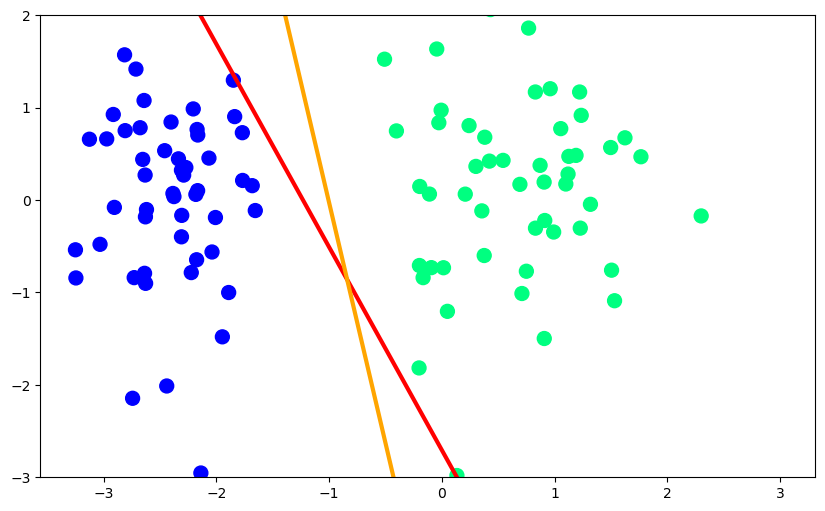

In [69]:
m1=-(w1/w2)
c=-(b1/w2)
x_i=np.linspace(-3,3,100)
y_i=m1*x_i+c
plt.figure(figsize=(10,6))
plt.plot(x_i,y_i,color='red',linewidth=3)
plt.plot(x_in,y_in,color='orange',linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

Problem with perceptron is it wont work on non-linear data so now multi layer perceptron(mlp) comes into play

we see some examples where single perceptron wont work

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [73]:
and_data

,input1,input2,ouput
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

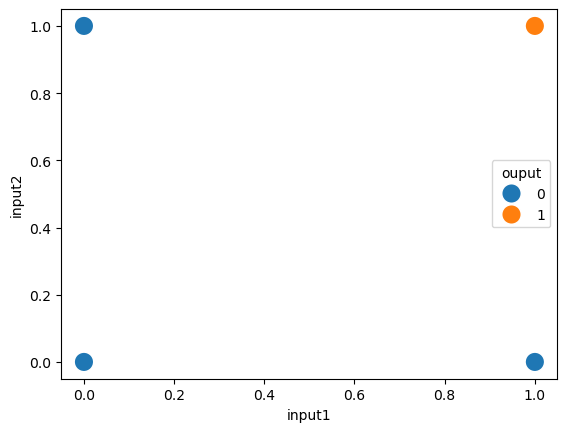

In [75]:
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

<Axes: xlabel='input1', ylabel='input2'>

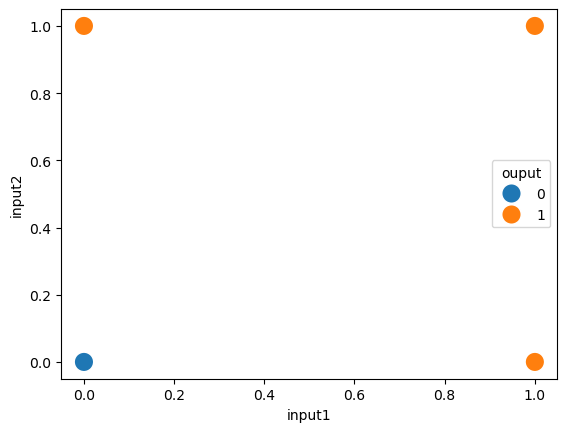

In [76]:
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

<Axes: xlabel='input1', ylabel='input2'>

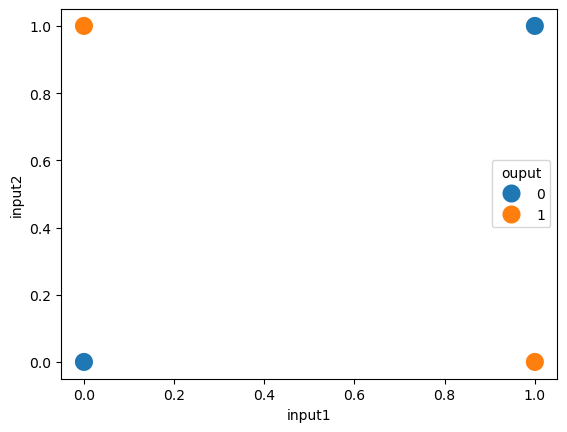

In [77]:
sns.scatterplot(x=xor_data['input1'],y=xor_data['input2'],hue=xor_data['ouput'],s=200)

In [78]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [79]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [80]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

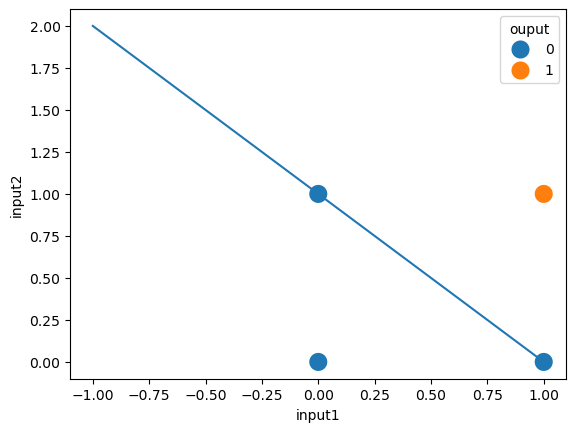

In [81]:
plt.plot(x,y)
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

In [82]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

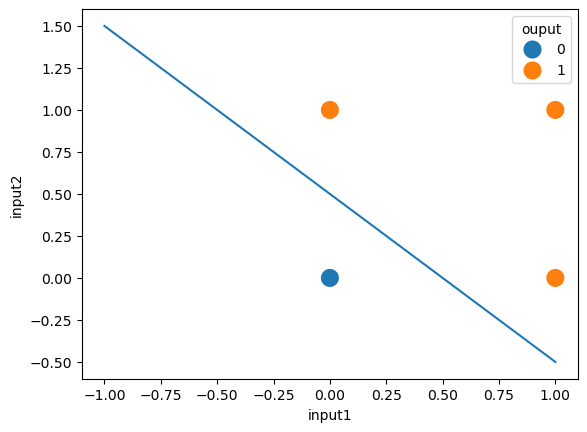

In [83]:
plt.plot(x1,y1)
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

In [84]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)

NameError: name 'plot_decision_regions' is not defined